In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
df.head(4)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [22]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [23]:
df.shape

(270, 14)

In [24]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [25]:
df.fillna(method="bfill",axis=0,inplace=True)

In [26]:
df.select_dtypes(include="object")

,Heart Disease
0,Presence
1,Absence
2,Presence
3,Absence
4,Absence
...,...
265,Absence
266,Absence
267,Absence
268,Absence


In [27]:
 for i in df.select_dtypes(include="object").columns:
        df[i].fillna(df[i].mode()[0],inplace=True)
        
    

In [28]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [29]:
df["Heart Disease"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object>

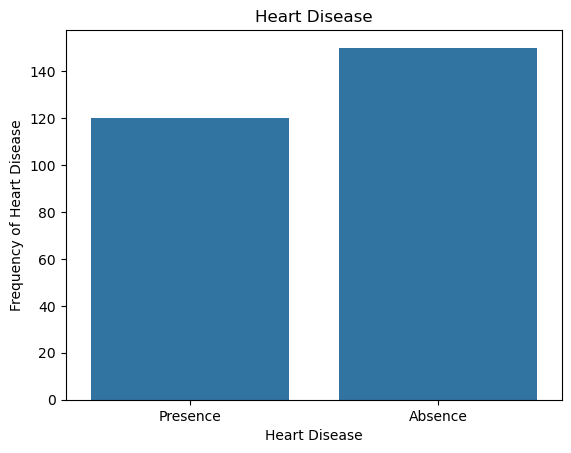

In [32]:
sns.countplot(x="Heart Disease",data=df)
plt.xlabel("Heart Disease")
plt.ylabel("Frequency of Heart Disease")
plt.title("Heart Disease")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encode=LabelEncoder()

In [33]:
df["Heart Disease"]=encode.fit_transform(df["Heart Disease"])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [34]:
x=df.drop(columns=["Heart Disease"])
y=df["Heart Disease"]

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=44)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(189, 13) (81, 13) (189,) (81,)


In [39]:
df=DecisionTreeRegressor()
df.fit(x_train,y_train)

DecisionTreeRegressor()

In [56]:
 pred=df.predict(x_test)
pred   

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.])

In [57]:
df.score(x_test,y_test)

0.1593406593406591

In [58]:

df.feature_importances_

array([0.08728113, 0.02592593, 0.12655615, 0.0369248 , 0.08128943,
       0.        , 0.        , 0.09359683, 0.        , 0.10521443,
       0.09189697, 0.10323663, 0.2480777 ])

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[33,  9],
       [ 8, 31]])

In [62]:


from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))

NameError: name 'y_pred' is not defined

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

[Text(0.5729166666666666, 0.9444444444444444, 'x[12] <= 6.5\nsquared_error = 0.245\nsamples = 189\nvalue = 0.429'),
 Text(0.2986111111111111, 0.8333333333333334, 'x[11] <= 0.5\nsquared_error = 0.183\nsamples = 120\nvalue = 0.242'),
 Text(0.43576388888888884, 0.8888888888888888, 'True  '),
 Text(0.1388888888888889, 0.7222222222222222, 'x[4] <= 272.0\nsquared_error = 0.097\nsamples = 83\nvalue = 0.108'),
 Text(0.08333333333333333, 0.6111111111111112, 'x[9] <= 3.55\nsquared_error = 0.045\nsamples = 64\nvalue = 0.047'),
 Text(0.05555555555555555, 0.5, 'x[7] <= 83.5\nsquared_error = 0.031\nsamples = 63\nvalue = 0.032'),
 Text(0.027777777777777776, 0.3888888888888889, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.08333333333333333, 0.3888888888888889, 'x[9] <= 2.8\nsquared_error = 0.016\nsamples = 62\nvalue = 0.016'),
 Text(0.05555555555555555, 0.2777777777777778, 'squared_error = 0.0\nsamples = 59\nvalue = 0.0'),
 Text(0.1111111111111111, 0.2777777777777778, 'x[4] <= 196.5\nsqua

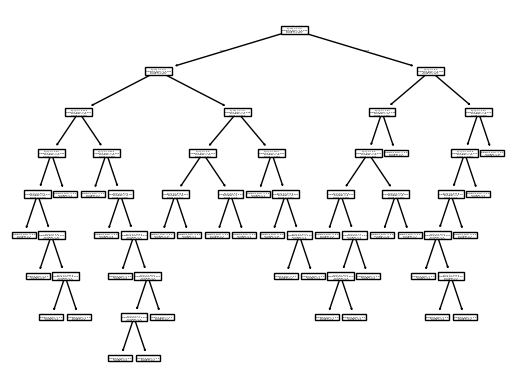

In [61]:
from sklearn import tree
tree.plot_tree(df)